In [2]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def función_b(x1, x2):
    return 0.75 * np.exp(-((( 10 * x1 -2 )**2 ) / 4) - ((( 9 * x2 -2 )**2 ) / 4)) + 0.65 * np.exp(-((( 9 * x1 +1 )**2 ) / 9) - ((( 10 * x2 +1 )**2 ) / 2)) + 0.55 * np.exp(-((( 9 * x1 -6 )**2 ) / 4) - ((( 9 * x2 -3 )**2 ) / 4)) -  0.01 * np.exp(-((( 9 * x1 -7 )**2 ) / 4) - ((( 9 * x2 -3 )**2 ) / 4))

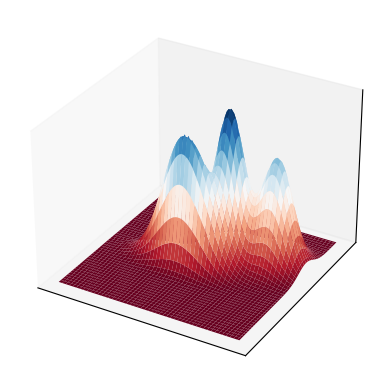

In [3]:
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = función_b(X1, X2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y, cmap='RdBu')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([]) 

plt.show()

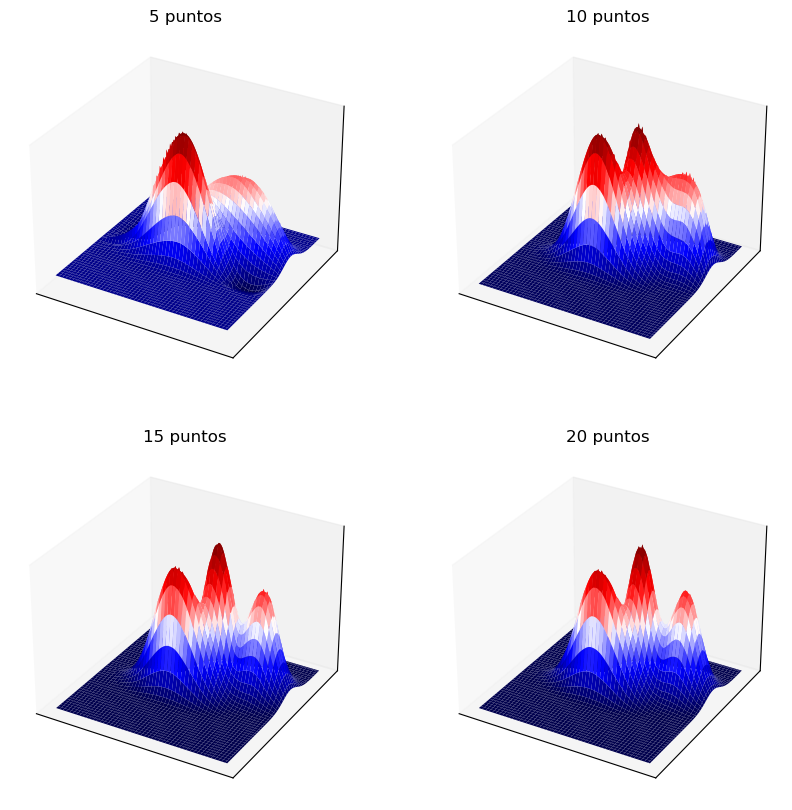

In [4]:
fig = plt.figure(figsize=(10, 10))

for index, i in enumerate(range(5, 21, 5), start=1):
    x1 = np.linspace(-1, 1, i)
    
    X1, X2 = np.meshgrid(x1, x2)
    Y = función_b(X1, X2)

    points = np.array([X1.flatten(), X2.flatten()]).T
    values = función_b(X1, X2).flatten()

    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = griddata(points, values, (X, Y), method='cubic')

    ax = fig.add_subplot(2, 2, index, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='seismic')
    ax.set_title(f'{i} puntos')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([]) 
plt.show()

In [5]:
# Comparo el error entre la aproximación con 15 puntos y la función real con 100

dict_error = {}

for cantidad_de_puntos in range(2, 101):
    x1 = np.linspace(-1, 1, cantidad_de_puntos)
    x2 = np.linspace(-1, 1, cantidad_de_puntos)
    X1, X2 = np.meshgrid(x1, x2)
    Y = función_b(X1, X2)

    points = np.array([X1.flatten(), X2.flatten()]).T
    values = función_b(X1, X2).flatten()

    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = griddata(points, values, (X, Y), method='cubic')

    error = np.linalg.norm(función_b(X, Y) - Z)

    dict_error[cantidad_de_puntos] = error

    print(f'Error con {cantidad_de_puntos} puntos: {error:.3e}')

Error con 2 puntos: 1.607e+01
Error con 3 puntos: 1.429e+01
Error con 4 puntos: 9.865e+00
Error con 5 puntos: 9.412e+00
Error con 6 puntos: 6.822e+00
Error con 7 puntos: 6.361e+00
Error con 8 puntos: 4.445e+00
Error con 9 puntos: 4.296e+00
Error con 10 puntos: 2.460e+00
Error con 11 puntos: 2.570e+00
Error con 12 puntos: 1.124e+00
Error con 13 puntos: 1.552e+00
Error con 14 puntos: 7.349e-01
Error con 15 puntos: 7.436e-01
Error con 16 puntos: 5.344e-01
Error con 17 puntos: 3.516e-01
Error con 18 puntos: 3.695e-01
Error con 19 puntos: 2.332e-01
Error con 20 puntos: 2.081e-01
Error con 21 puntos: 1.772e-01
Error con 22 puntos: 1.684e-01
Error con 23 puntos: 1.296e-01
Error con 24 puntos: 1.082e-01
Error con 25 puntos: 9.165e-02
Error con 26 puntos: 9.248e-02
Error con 27 puntos: 7.602e-02
Error con 28 puntos: 7.080e-02
Error con 29 puntos: 5.863e-02
Error con 30 puntos: 5.600e-02
Error con 31 puntos: 5.088e-02
Error con 32 puntos: 4.811e-02
Error con 33 puntos: 1.633e-02
Error con 34 pun

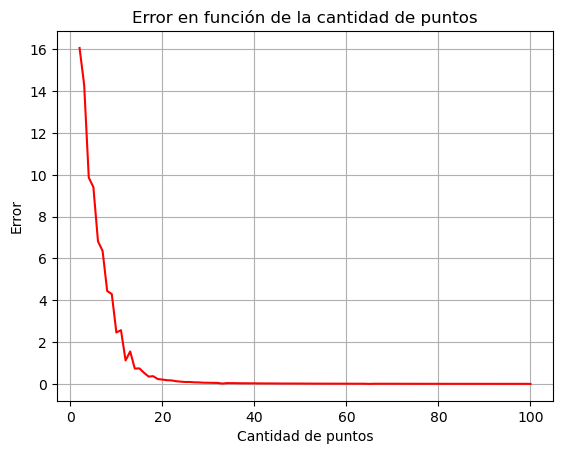

In [6]:
# Gafico el error en función de la cantidad de puntos

fig, ax = plt.subplots()

plt.plot(list(dict_error.keys()), list(dict_error.values()), color='red')
ax.set_title('Error en función de la cantidad de puntos')
ax.set_xlabel('Cantidad de puntos')
ax.set_ylabel('Error')
plt.grid()
plt.show()